<h1 style="color:blue; text-align:center;">KNN</h1>


<h2>Importing Libraries</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

<h2>Load the Preprocessed Dataset</h2>

In [3]:
df = pd.read_csv("../Dataset/after_preprocessing.csv")
df.shape

(73915, 23)

<h2>Explore the Target Column</h2>

In [4]:
target_categories = df['Attrition'].unique()

In [5]:
print("Categories in the target column : ")
for category in target_categories:
    print(category)

Categories in the target column : 
1
0


<h2>Split the Dataset into Features and Target</h2>

In [6]:
x = df.drop(columns = [ 'Attrition'])
y = df['Attrition']

<h2>Split the Dataset into Training and Testing</h2>

In [7]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

<h2>Train a KNN Classifier</h2>

In [8]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(x_test)

<h2>Evaluate the KNN Classifier</h2>

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4665 2306]
 [2469 5343]]


In [11]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

print("True Positives (TP) :", TP)
print("True Negatives (TN) :",TN)
print("False Positive (FP) :",FP)
print("False Negatives (FN)  :",FN)

True Positives (TP) : 5343
True Negatives (TN) : 4665
False Positive (FP) : 2306
False Negatives (FN)  : 2469


In [12]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_measure = 2 *(precision * recall) / ( precision + recall)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("f_measure : ", f_measure)

Accuracy :  0.6769938442805926
Precision :  0.6985226827036214
Recall :  0.6839477726574501
f_measure :  0.6911583985511933


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6971
           1       0.70      0.68      0.69      7812

    accuracy                           0.68     14783
   macro avg       0.68      0.68      0.68     14783
weighted avg       0.68      0.68      0.68     14783



<h2>Find the Best K Value Using Cross-Validation</h2>

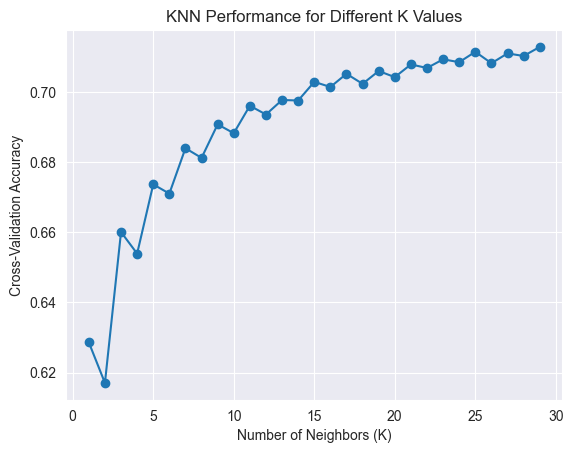

Best K: 29


In [14]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 30))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.plot(k_values, cv_scores, marker = 'o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance for Different K Values')
plt.show()


best_k = k_values[np.argmax(cv_scores)]
print("Best K:", best_k)

<h2>Train and Evaluate KNN Classifier with the Best K Value</h2>

In [15]:
best_knn = KNeighborsClassifier(n_neighbors = 29)
best_knn.fit(x_train,y_train)
y_pred = best_knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

print("True Positives (TP) :", TP)
print("True Negatives (TN) :",TN)
print("False Positive (FP) :",FP)
print("False Negatives (FN)  :",FN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_measure = 2 *(precision * recall) / ( precision + recall)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("f_measure : ", f_measure)

print(classification_report(y_test,y_pred))

[[4891 2080]
 [2163 5649]]
True Positives (TP) : 5649
True Negatives (TN) : 4891
False Positive (FP) : 2080
False Negatives (FN)  : 2163
Accuracy :  0.7129811269701685
Precision :  0.7308836848233924
Recall :  0.7231182795698925
f_measure :  0.7269802458014284
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6971
           1       0.73      0.72      0.73      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783



<h2>Visualize the Confusion Matrix</h2>

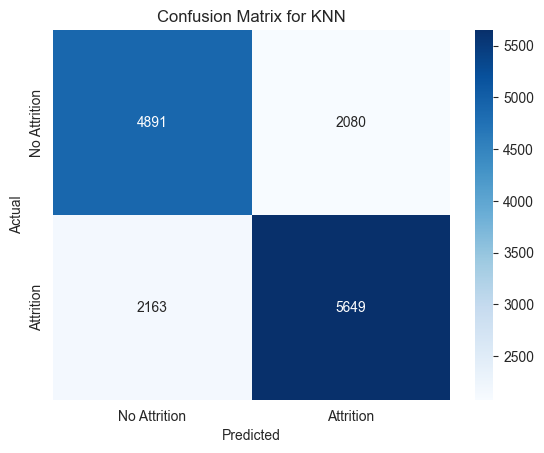

In [16]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

<h2>Feature Selection</h2>

In [17]:
print("Shape of x_train before feature selection:", x_train.shape)

Shape of x_train before feature selection: (59132, 22)


In [18]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

<h2>Best k for Chi-Square and Mutual Information</h2>

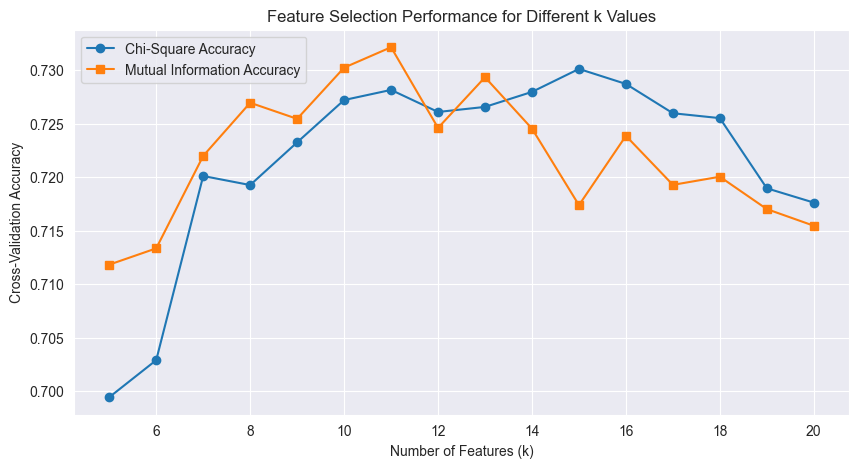

Best k for Chi-Square Feature Selection: 15
Best k for Mutual Information Feature Selection: 11


In [19]:
k_values = list(range(5, 21))
chi2_scores = []
mi_scores = []

for k in k_values:
    selector_chi2 = SelectKBest(score_func=chi2, k=k)
    x_train_selected_chi2 = selector_chi2.fit_transform(x_train, y_train)
    x_test_selected_chi2 = selector_chi2.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=29)
    knn.fit(x_train_selected_chi2, y_train)

    accuracy_chi2 = np.mean(cross_val_score(knn, x_train_selected_chi2, y_train, cv=5, scoring='accuracy'))
    chi2_scores.append(accuracy_chi2)

    selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
    x_train_selected_mi = selector_mi.fit_transform(x_train, y_train)
    x_test_selected_mi = selector_mi.transform(x_test)
    knn.fit(x_train_selected_mi, y_train)

    accuracy_mi = np.mean(cross_val_score(knn, x_train_selected_mi, y_train, cv=5, scoring='accuracy'))
    mi_scores.append(accuracy_mi)

plt.figure(figsize=(10, 5))
plt.plot(k_values, chi2_scores, marker='o', label='Chi-Square Accuracy')
plt.plot(k_values, mi_scores, marker='s', label='Mutual Information Accuracy')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Feature Selection Performance for Different k Values')
plt.legend()
plt.show()

best_k_chi2 = k_values[np.argmax(chi2_scores)]
best_k_mi = k_values[np.argmax(mi_scores)]

print("Best k for Chi-Square Feature Selection:", best_k_chi2)
print("Best k for Mutual Information Feature Selection:", best_k_mi)


In [26]:
k = best_k_chi2
selector_chi2 = SelectKBest(score_func=chi2, k=k)
x_train_selected_chi2 = selector_chi2.fit_transform(x_train, y_train)
x_test_selected_chi2 = selector_chi2.transform(x_test)

print("Shape of x_train after Chi-Square feature selection:", x_train_selected_chi2.shape)

Shape of x_train after Chi-Square feature selection: (59132, 15)


In [27]:
best_knn.fit(x_train_selected_chi2, y_train)
y_pred2 = best_knn.predict(x_test_selected_chi2)

accuracy_chi2 = accuracy_score(y_test, y_pred2)
print("Accuracy after Chi-Square feature selection:", accuracy_chi2)

Accuracy after Chi-Square feature selection: 0.7326659000202935


In [28]:
selected_feature_indices = selector_chi2.get_support(indices=True)

selected_feature_names = x_train.columns[selected_feature_indices]
print("Selected feature indices:", selected_feature_indices)
print("Selected feature names:", list(selected_feature_names))

Selected feature indices: [ 0  1  2  5  6  7  8  9 10 11 12 13 14 17 20]
Selected feature names: ['Age', 'Gender', 'Years at Company', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Remote Work', 'Company Reputation']


In [29]:
k = best_k_mi
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
x_train_selected_mi = selector_mi.fit_transform(x_train, y_train)
x_test_selected_mi = selector_mi.transform(x_test)

print("Shape of x_train after Mutual Information feature selection:", x_train_selected_mi.shape)

best_knn.fit(x_train_selected_mi, y_train)
y_pred3 = best_knn.predict(x_test_selected_mi)

accuracy_mi = accuracy_score(y_test, y_pred3)
print("Accuracy after Mutual Information feature selection:", accuracy_mi)

Shape of x_train after Mutual Information feature selection: (59132, 11)
Accuracy after Mutual Information feature selection: 0.724142596225394


In [30]:
selected_features_mi = selector_mi.get_support(indices=True)
selected_feature_names_mi = x_train.columns[selected_features_mi]
print("Selected Features (Mutual Information):", list(selected_feature_names_mi))

Selected Features (Mutual Information): ['Gender', 'Job Role', 'Work-Life Balance', 'Number of Promotions', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Remote Work', 'Company Reputation']
